<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# üìù Assignment
---

# Ridge Regression

Ïù¥Î≤à Î™®ÎìàÏóêÏÑú Î∞∞Ïö¥ ÎÇ¥Ïö©ÏùÑ Ï°∞Í∏à Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Î≥µÏäµÌï¥ Î¥ÖÏãúÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÎ≥¥Îäî Îã§Ïùå ÎßÅÌÅ¨Î•º Ï∞∏Ï°∞Ìï¥ Ï£ºÏÑ∏Ïöî.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

Ïù¥Î≤àÏóêÎèÑ Price Î≥ÄÏàòÎ•º targetÏúºÎ°ú Ï†ïÌïòÍ≥† Î™®Îç∏ÏùÑ Íµ¨ÏÑ±Ìï¥ Î¥ÖÏãúÎã§.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)



In [2]:
df.head()

Rooms Type      Price Method  Postcode             Regionname  \
0      3    h  1490000.0      S      3067  Northern Metropolitan   
1      3    h  1220000.0      S      3067  Northern Metropolitan   
2      3    h  1420000.0      S      3067  Northern Metropolitan   
3      3    h  1515000.0      S      3040   Western Metropolitan   
4      2    h   670000.0      S      3042   Western Metropolitan   

   Propertycount  Distance                 CouncilArea  
0           4019       3.0          Yarra City Council  
1           4019       3.0          Yarra City Council  
2           4019       3.0          Yarra City Council  
3           1543       7.5  Moonee Valley City Council  
4           3464      10.4  Moonee Valley City Council

In [3]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

### 1) Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌï¥ pandas_profilingÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥¥ÏÑ∏Ïöî.
- **Î≤îÏ£ºÌòï ÌäπÏÑ±ÏúºÎ°ú ÏõêÌï´Ïù∏ÏΩîÎî©Ïù¥ Íº≠ ÌïÑÏöîÌïú ÌäπÏÑ±Ïùò Í∞ØÏàòÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**

In [4]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###

ProfileReport(df)

In [5]:
df.dtypes

Rooms              int64
Type              object
Price            float64
Method            object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [6]:
categorical = df.columns[df.dtypes == object]
categorical

Index(['Type', 'Method', 'Regionname', 'CouncilArea'], dtype='object')

In [7]:
df[categorical].head()

Type Method             Regionname                 CouncilArea
0    h      S  Northern Metropolitan          Yarra City Council
1    h      S  Northern Metropolitan          Yarra City Council
2    h      S  Northern Metropolitan          Yarra City Council
3    h      S   Western Metropolitan  Moonee Valley City Council
4    h      S   Western Metropolitan  Moonee Valley City Council

### 2) Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ one-hot encoding(category_encoders)ÏùÑ ÏàòÌñâÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º train/test ÏÖãÏúºÎ°ú Î¨¥ÏûëÏúÑÎ°ú ÎÇòÎàÑÏñ¥ Ï£ºÏÑ∏Ïöî.(train/test = 80%/20%)
- [category_encoders.one_hot.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html#one-hot), ÌååÎùºÎØ∏ÌÑ∞Îäî use_cat_names = True ÏÇ¨Ïö©
- Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨Îäî [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn-model-selection-train-test-split) ÏùÑ ÏÇ¨Ïö©Ìï¥ Ï£ºÏÑ∏Ïöî. ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Îäî test_size, train_size, random_state=2 ÏûÖÎãàÎã§. ÎÇòÎ®∏ÏßÄÎäî default ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- **Î∂ÑÎ¶¨Îêú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò Ï≤´Î≤àÏß∏ ÏÉòÌîåÏùò Ïù∏Îç±Ïä§ Í∞íÎ•º Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**


In [8]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(use_cat_names = True)
df2 = encoder.fit_transform(df)
df2

C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Rooms  Type_h  Type_t  Type_u      Price  Method_S  Method_SP  \
0          3       1       0       0  1490000.0         1          0   
1          3       1       0       0  1220000.0         1          0   
2          3       1       0       0  1420000.0         1          0   
3          3       1       0       0  1515000.0         1          0   
4          2       1       0       0   670000.0         1          0   
...      ...     ...     ...     ...        ...       ...        ...   
63015      2       0       0       1   340000.0         0          1   
63016      2       0       0       1   347700.0         0          1   
63017      3       1       0       0   808000.0         1          0   
63018      3       1       0       0   566000.0         1          0   
63020      3       1       0       0   545000.0         1          0   

       Method_VB  Method_PI  Method_SA  ...  \
0              0          0          0  ...   
1              0          0          0  ...   
2              0          0          0  ...   
3              0          0          0  ...   
4              0          0          0  ...   
...          ...        ...        ...  ...   
63015          0          0          0  ...   
63016          0          0          0  ...   
63017          0          0          0  ...   
63018          0          0          0  ...   
63020          0          0          0  ...   

       CouncilArea_Nillumbik Shire Council  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
63015                                    0   
63016                                    0   
63017                                    0   
63018                                    0   
63020                                    0   

       CouncilArea_Whittlesea City Council  CouncilArea_Knox City Council  \
0                                        0                              0   
1                                        0                              0   
2                                        0                              0   
3                                        0                              0   
4                                        0                              0   
...                                    ...                            ...   
63015                                    0                              0   
63016                                    0                              0   
63017                                    0                              0   
63018                                    0                              0   
63020                                    0                              0   

       CouncilArea_Wyndham City Council  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
63015                                 0   
63016                                 0   
63017                                 0   
63018                                 0   
63020                                 0   

       CouncilArea_Yarra Ranges Shire Council  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
63015                                       0   
63016                                       0   
63017                                       0   
63018                                       0   
63020                                      

In [9]:
df2.columns.value_counts().sum()

55

In [10]:
df2.columns.difference(['Price']).value_counts().sum()

54

In [11]:
from sklearn.model_selection import train_test_split

X = df2[df2.columns.difference(['Price'])]
y = df2[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df2.shape)


print(X_train.index[0])

(34012, 54)
(8503, 54)
(34012, 1)
(8503, 1)
(42515, 55)
602


### 3) SelectKBestÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú 20Í∞úÏùò ÌäπÏÑ±Îßå selection ÌïòÏÑ∏Ïöî
- score_func ÏóêÎäî f_regressionÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§
- **Í∞ÄÏû• Ïä§ÏΩîÏñ¥(Attributes: scores_ ÏÇ¨Ïö©)Í∞Ä ÎÜíÍ≤å ÎÇòÏò® ÌäπÏÑ±Ïùò Ïù¥Î¶ÑÏùÑ Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**

In [12]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func=f_regression, k=20)

## ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïóê fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî transform
X_test_selected = selector.transform(X_test)



all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## ÏÑ†ÌÉùÎêú ÌäπÏÑ±Îì§
selected_names = all_names[selected_mask]

## ÏÑ†ÌÉùÎêòÏßÄ ÏïäÏùÄ ÌäπÏÑ±Îì§
unselected_names = all_names[~selected_mask] 


C:\Users\tkryu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
scores = selector.scores_
[scores]

[array([6.93557864e+01, 1.12726126e+03, 3.26653485e+03, 6.38039034e+02,
        2.33441563e+01, 9.74261823e+01, 7.17963601e+01, 1.38586421e+02,
        5.85208256e+01, 1.30263440e+02, 5.51647600e-02, 8.14381730e+02,
        2.12817559e+01, 3.53274926e+01, 9.93011045e+00, 1.39372210e+02,
        1.21012219e+02, 4.97108842e+01, 6.50797782e+00, 2.39754800e+02,
        1.22907811e+01, 1.20781309e+02, 8.14875758e+00, 7.37680145e+00,
        9.62941333e+01, 1.55238372e-01, 3.29476644e+01, 5.57316131e+01,
        8.72533532e+02, 2.18947243e+01, 6.37945026e+02, 4.09675454e+02,
        3.06680430e+01, 2.61352948e+01, 2.16395591e+03, 4.93153083e+01,
        2.72124035e+00, 5.48849696e+00, 3.71085374e+02, 3.13176886e+02,
        1.36396400e+00, 7.22590012e+01, 8.07361356e+01, 7.65995809e+01,
        1.13002226e+03, 9.47922718e+01, 2.12740362e+02, 5.29299145e+03,
        9.36929364e+02, 1.22890819e+02, 7.01402603e+03, 3.46397302e+03,
        9.95939585e+01, 3.60117719e+03])]

In [14]:
selected_names

Index(['CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Frankston City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Wyndham City Council', 'Distance', 'Method_SP',
       'Method_VB', 'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Rooms', 'Type_h', 'Type_u'],
      dtype='object')

In [15]:
# ÏÑ†ÌÉùÎêú featureÎì§Ïùò Î≤àÌò∏ÏôÄ, scoreÏùò Î≤àÌò∏Î•º ÌÜµÌï¥ feature nameÍ≥º scoreÎ•º Îß§Ïπò ÏãúÌÇ®Îã§.
# dictionaryÎ°ú ÎßåÎì†Îã§

selected_features = selector.fit(X_train, y_train)
selected_dict = {}
for i in selected_features.get_support(indices=True):
    selected_dict[all_names[i]] = scores[i]

selected_dict

C:\Users\tkryu\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'CouncilArea_Bayside City Council': 1127.261256505291,
 'CouncilArea_Boroondara City Council': 3266.5348462362836,
 'CouncilArea_Brimbank City Council': 638.0390344420028,
 'CouncilArea_Frankston City Council': 138.58642131180864,
 'CouncilArea_Hume City Council': 814.3817298615417,
 'CouncilArea_Manningham City Council': 139.3722095697393,
 'CouncilArea_Melton City Council': 239.75479991849977,
 'CouncilArea_Stonnington City Council': 872.5335323404521,
 'CouncilArea_Whittlesea City Council': 637.9450261189508,
 'CouncilArea_Wyndham City Council': 409.67545401359786,
 'Distance': 2163.9559073530986,
 'Method_SP': 371.0853744259934,
 'Method_VB': 313.17688577672965,
 'Regionname_Northern Metropolitan': 1130.0222593349977,
 'Regionname_South-Eastern Metropolitan': 212.74036214264737,
 'Regionname_Southern Metropolitan': 5292.991446822521,
 'Regionname_Western Metropolitan': 936.9293644907547,
 'Rooms': 7014.026027529074,
 'Type_h': 3463.9730175023624,
 'Type_u': 3601.177189070797}

In [16]:
# Î≥¥Í∏∞ ÏâΩÍ≤å Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Í≥†, scoreÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨

selected_df = pd.DataFrame.from_dict(selected_dict,orient='index')
selected_df.reset_index(inplace=True)
selected_df.columns = ['feature', 'score']
selected_df.sort_values('score', ascending=False, inplace=True)
selected_df.reset_index(inplace=True, drop=True)
selected_df

feature        score
0                                   Rooms  7014.026028
1        Regionname_Southern Metropolitan  5292.991447
2                                  Type_u  3601.177189
3                                  Type_h  3463.973018
4     CouncilArea_Boroondara City Council  3266.534846
5                                Distance  2163.955907
6        Regionname_Northern Metropolitan  1130.022259
7        CouncilArea_Bayside City Council  1127.261257
8         Regionname_Western Metropolitan   936.929364
9    CouncilArea_Stonnington City Council   872.533532
10          CouncilArea_Hume City Council   814.381730
11      CouncilArea_Brimbank City Council   638.039034
12    CouncilArea_Whittlesea City Council   637.945026
13       CouncilArea_Wyndham City Council   409.675454
14                              Method_SP   371.085374
15                              Method_VB   313.176886
16        CouncilArea_Melton City Council   239.754800
17  Regionname_South-Eastern Metropolitan   212.740362
18    CouncilArea_Manningham City Council   139.372210
19     CouncilArea_Frankston City Council   138.586421

In [17]:
# Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÏùÄ feature
selected_df.iloc[0]

feature      Rooms
score      7014.03
Name: 0, dtype: object

### 4) RidgeCVÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî
- attributeÎäî normalize=True, cv=5Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî. ÎÇòÎ®∏ÏßÄÎäî default
- **alphas = [0, 0.001, 0.01, 0.1, 1] ÏùÑ ÏãúÎèÑÌï¥Î≥¥Í≥† Í∞ÄÏû• Ï¢ãÏùÄ Ï†êÏàòÍ∞Ä ÎÇòÏò® alpha Í∞íÏùÑ Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**

In [18]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
from sklearn.linear_model import RidgeCV

alphas =  [0, 0.001, 0.01, 0.1, 1]

ridge = RidgeCV(alphas = alphas, normalize = True, cv= 5)

ridge.fit(X_train[selected_names], y_train)

print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.001
best score:  0.5510507608242425


### 5) ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú MAE Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† Î™®Îç∏Ïù¥ Ïûò ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥ÏÑ∏Ïöî.
- **ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú MAE Í∞íÏùÑ Í≥ºÏ†ú Ï†úÏ∂úÌèºÏóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.**

In [19]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###
# Ridge ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä•

from sklearn.linear_model import Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

y_pred_cv_test = ridge.predict(X_test[selected_names])
mae_cv_test = mean_absolute_error(y_test, y_pred_cv_test)
mse_cv_test = mean_squared_error(y_test, y_pred_cv_test)
rmse_cv_test = mse_cv_test ** 0.5
r2_cv_test = r2_score(y_test, y_pred_cv_test)

print("mae_cv_test :" , mae_cv_test)
print("mse_cv_test :" , mse_cv_test)
print("rmse_cv_test :" , rmse_cv_test)
print("r2_cv_test :", r2_cv_test)


mae_cv_test : 262857.3198109039
mse_cv_test : 160464127925.1939
rmse_cv_test : 400579.73978372134
r2_cv_test : 0.5691390939752935


In [20]:
# train vs test ÎπÑÍµê

y_pred_cv_train = ridge.predict(X_train[selected_names])

mae_cv_train = mean_absolute_error(y_train, y_pred_cv_train)
mse_cv_train = mean_squared_error(y_train, y_pred_cv_train)
rmse_cv_train = mse_cv_train ** 0.5
r2_cv_train = r2_score(y_train, y_pred_cv_train)

print("mae_cv_train :" , mae_cv_train)
print("mse_cv_train :" , mse_cv_train)
print("rmse_cv_train :" , rmse_cv_train)
print("r2_cv_train :", r2_cv_train)

mae_cv_train : 260599.0091362285
mse_cv_train : 163171651671.46017
rmse_cv_train : 403945.1097258886
r2_cv_train : 0.5515558021086516


In [21]:
# linear regression Í≥ºÏùò ÎπÑÍµê

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train[selected_names], y_train)
y_pred_linear_train = model_linear.predict(X_train[selected_names])
y_pred_linear_test = model_linear.predict(X_test[selected_names])

mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
rmse_linear_test = mse_linear_test ** 0.5
r2_linear_test = r2_score(y_test, y_pred_linear_test)

print("mae_linear_test :", mae_linear_test)
print("mse_linear_test :", mse_linear_test)
print("rmse_linear_test :", rmse_linear_test)
print("r2_linear_test :", r2_linear_test)

print(mae_cv_test > mae_linear_test)
print(mse_cv_test > mse_linear_test)
print(rmse_cv_test > rmse_linear_test)
print(r2_cv_test > r2_linear_test)

mae_linear_test : 262916.5845828832
mse_linear_test : 160454944045.75974
rmse_linear_test : 400568.276384638
r2_linear_test : 0.5691637535341929
False
True
True
False


## üî• ÎèÑÏ†ÑÍ≥ºÏ†ú

### 6) best ridge regression modelÏùÑ ÎßåÎìúÏÑ∏Ïöî.
    - ÌäπÏÑ±Ïùò Í∞ØÏàòÏóê Ï†úÌïúÏù¥ ÏóÜÏäµÎãàÎã§.
    - Îã§Ìï≠ÌöåÍ∑ÄÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî
    - Ïó¨Îü¨ ÎûåÎã§Í∞íÏùÑ ÏãúÎèÑÌïòÏÑ∏Ïöî
    - ÎûåÎã§ 0Ïù∏ Í≤ΩÏö∞Î•º ÎπÑÍµêÌïòÏÑ∏Ïöî
    - RidgeCVÎ•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî
    - ÎßåÎì† Î™®Îç∏Ïùò ÌäπÏßïÏùÑ Í∞ÑÎûµÌûà ÏÑ§Î™ÖÌïòÍ≥† ÌÖåÏä§Ìä∏ÏÑ∏Ìä∏ ÏÑ±Îä• Í≤∞Í≥ºÎ•º Î©îÏã†Ï†ÄÏóêÏÑú Í≥µÏú†ÌïòÏÑ∏Ïöî

In [22]:
### Ïù¥Í≥≥ÏóêÏÑú Í≥ºÏ†úÎ•º ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî ###


Rooms: Number of rooms


Type:  
- br - bedroom(s);  
- h - house,cottage,villa, semi,terrace;  
- u - unit, duplex;  
- t - townhouse;  
- dev site - development site;  
- o res - other residential.  
    

Price: Price in Australian dollars

Method:  
- S - property sold;  
- SP - property sold prior;  
- PI - property passed in;  
- PN - sold prior not disclosed;  
- SN - sold not disclosed;  
- NB - no bid;  
- VB - vendor bid;  
- W - withdrawn prior to auction;   
- SA - sold after auction;  
- SS - sold after auction price not disclosed.  
- N/A - price or highest bid not available.  


Regionname: General Region (West, North West, North, North east ‚Ä¶etc)


Propertycount: Number of properties that exist in the suburb.

Distance: Distance from CBD in Kilometres

CouncilArea: Governing council for the area


In [23]:
df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Regionname',
       'Propertycount', 'Distance', 'CouncilArea'],
      dtype='object')

In [24]:
# postcodeÎäî Í∞ÄÍ≤©Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÍ∞Ä ÏïÑÎãàÎùºÎäî ÌåêÎã®. drop
df3 = df.drop(['Postcode'], axis = 1)

df3.head()

Rooms Type      Price Method             Regionname  Propertycount  \
0      3    h  1490000.0      S  Northern Metropolitan           4019   
1      3    h  1220000.0      S  Northern Metropolitan           4019   
2      3    h  1420000.0      S  Northern Metropolitan           4019   
3      3    h  1515000.0      S   Western Metropolitan           1543   
4      2    h   670000.0      S   Western Metropolitan           3464   

   Distance                 CouncilArea  
0       3.0          Yarra City Council  
1       3.0          Yarra City Council  
2       3.0          Yarra City Council  
3       7.5  Moonee Valley City Council  
4      10.4  Moonee Valley City Council

In [25]:
# categorical data Î≥ÄÌôò
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True)

df4 = encoder.fit_transform(df3)

# train / test ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split

XX = df4[df4.columns.difference(['Price'])]
yy = df4[['Price']]
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, train_size=0.8, test_size=0.2, random_state=2)


C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [26]:
from sklearn.feature_selection import f_regression, SelectKBest

selector2 = SelectKBest(score_func=f_regression, k=10)

In [27]:
# warning Í¥ÄÎ†® 
#https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
yy_train = yy_train.values.ravel()

In [28]:
validation = pd.DataFrame(columns = ['no_features', 'train_mae', 'test_mae'])

In [29]:
validation['no_features']

Series([], Name: no_features, dtype: object)

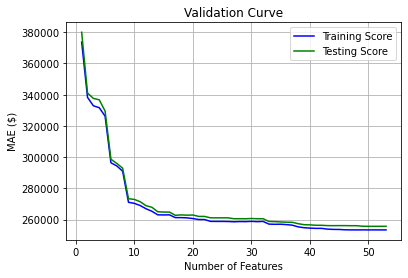

In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

training = []
testing = []
ks = range(1, len(XX_train.columns)+1)

for k in range(1, len(XX_train.columns)+1):
#     print(f'{k} features')
#     new_no = {'no_features': k}
#     validation.append(new_no)
#     validation['no_features'][k] = k
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    XX_train_selected = selector.fit_transform(XX_train, yy_train)
    XX_test_selected = selector.transform(XX_test)
    
    all_names = XX_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
#     print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(XX_train_selected, yy_train)
    yy_pred = model.predict(XX_train_selected)
    mae_train = mean_absolute_error(yy_train, yy_pred)
    training.append(mae_train)
    
#     validation['train_mae'][k] = mae
    
    yy_pred = model.predict(XX_test_selected)
    mae_test = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    testing.append(mae_test)
    
    new_data = {'no_features':k, 'train_mae':mae_train, 'test_mae':mae_test}
    validation = validation.append(new_data,ignore_index=True)
    
#     validation['test_mae'][k] = mae
    
#     print(f'Test MAE: ${mae:,.0f}')
#     print(f'Test R2: {r2} \n')
    
    
    
plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.grid()
plt.show()

In [31]:
validation['train_difference'] = 0
validation['test_difference'] = 0
for i in range(1,len(validation)):
    validation['train_difference'][i] = validation['train_mae'][i-1] - validation['train_mae'][i]
    validation['test_difference'][i] = validation['test_mae'][i-1] - validation['test_mae'][i]

<ipython-input-31-f3c587748a53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['train_difference'][i] = validation['train_mae'][i-1] - validation['train_mae'][i]
<ipython-input-31-f3c587748a53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['test_difference'][i] = validation['test_mae'][i-1] - validation['test_mae'][i]


In [32]:
validation

no_features      train_mae       test_mae  train_difference  \
0           1.0  373659.596823  379996.508331                 0   
1           2.0  338264.813194  341050.825211             35394   
2           3.0  332886.208891  337588.052304              5378   
3           4.0  331666.410927  336729.565919              1219   
4           5.0  326264.231291  329517.975179              5402   
5           6.0  296384.452703  298642.586873             29879   
6           7.0  294356.740621  295971.534135              2027   
7           8.0  290994.538810  292931.352140              3362   
8           9.0  271055.863677  273338.791275             19938   
9          10.0  270385.669711  272901.884857               670   
10         11.0  268989.535748  271409.130922              1396   
11         12.0  266899.386119  268881.844665              2090   
12         13.0  265304.715518  267870.065602              1594   
13         14.0  263019.553826  264985.170160              2285   
14         15.0  262949.329470  264797.440378                70   
15         16.0  263011.257955  264793.876613               -61   
16         17.0  261249.469366  262717.668574              1761   
17         18.0  261239.143949  262979.470449                10   
18         19.0  261082.861652  262810.565850               156   
19         20.0  260654.244039  262916.584583               428   
20         21.0  260021.015792  262014.807607               633   
21         22.0  260011.045493  262002.701439                 9   
22         23.0  258830.794910  261122.917527              1180   
23         24.0  258802.028627  261096.823125                28   
24         25.0  258802.028627  261096.823125                 0   
25         26.0  258748.236963  261109.614164                53   
26         27.0  258568.691147  260536.654131               179   
27         28.0  258713.024325  260545.285579              -144   
28         29.0  258667.987075  260516.724449                45   
29         30.0  258840.453663  260672.979889              -172   
30         31.0  258651.265187  260531.364518               189   
31         32.0  258804.877766  260516.952595              -153   
32         33.0  257076.493385  258765.003177              1728   
33         34.0  256961.093831  258671.379594               115   
34         35.0  257009.958679  258465.945755               -48   
35         36.0  256759.080446  258307.477750               250   
36         37.0  256390.656416  258228.833789               368   
37         38.0  255316.252186  257340.572634              1074   
38         39.0  254766.727045  256706.748744               549   
39         40.0  254509.915768  256603.611704               256   
40         41.0  254346.610811  256344.934894               163   
41         42.0  254352.662735  256319.837453                -6   
42         43.0  253853.173493  256121.913811               499   
43         44.0  253691.698814  256087.565377               161   
44         45.0  253646.178487  256118.137088                45   
45         46.0  253434.792178  256119.023221               211   
46         47.0  253370.979369  256057.904272                63   
47         48.0  253374.076030  256066.924945                -3   
48         49.0  253379.014988  255714.299138                -4   
49         50.0  253374.389772  255660.528431                 4   
50         51.0  253374.389772  255660.528431                 0   
51         52.0  253362.221280  255676.287448                12   
52         53.0  253362.102271  255676.307391                 0   

    test_difference  
0                 0  
1             38945  
2              3462  
3               858  
4              7211  
5             30875  
6              2671  
7              3040  
8             19592  
9               436  
10             1492  
11             2527  
12             1011  
13             2884  
14              187  
15                3  
16         

### 14Í∞úÏùò ÌäπÏÑ± ÍπåÏßÄÍ∞Ä maeÏóê ÌÅ∞ Î≥ÄÌôîÎ•º Ï§ÄÎã§Í≥† ÌåêÎã®Îê®. -> ÌäπÏÑ±ÏùÄ 14Í∞úÍπåÏßÄÎßå Ïì∞Îäî Í≤ÉÏúºÎ°ú Í≤∞Ï†ï 

In [33]:
# 14Í∞ú ÌäπÏÑ±ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï°∞Ï†ï
selector2 = SelectKBest(score_func=f_regression, k=14)
XX_train_selected = selector2.fit_transform(XX_train, yy_train)
XX_test_selected = selector2.transform(XX_test)

all_names2 = XX_train.columns
selected_mask2 = selector2.get_support()
selected_names2 = all_names2[selected_mask2]

XX_train_final = XX_train[selected_names2]
XX_test_final = XX_test[selected_names2]

In [34]:
# Îã§Ìï≠ÌöåÍ∑Ä

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))

for alpha in [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge Î™®Îç∏ ÌïôÏäµ
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(XX_train_final, yy_train)
    yy_pred = model.predict(XX_test_final)

    # MAE for test
    mae = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $216,446
R2 Score: 0.6747

Ridge Regression, alpha=0.01
Test MAE: $218,117
R2 Score: 0.6698

Ridge Regression, alpha=0.05
Test MAE: $220,167
R2 Score: 0.6632

Ridge Regression, alpha=0.1
Test MAE: $221,966
R2 Score: 0.6583

Ridge Regression, alpha=0.5
Test MAE: $232,664
R2 Score: 0.6317

Ridge Regression, alpha=1.0
Test MAE: $240,564
R2 Score: 0.6100

Ridge Regression, alpha=10
Test MAE: $288,443
R2 Score: 0.4724

Number of Features: 680


### alphaÍ∞íÏù¥ 0.001Ïùº Îïå Í∞ÄÏû• Ï†êÏàòÍ∞Ä ÎÜíÍ≥†, alphaÍ∞í ÎÜíÏùÑÏàòÎ°ù Ï†êÏàò Îñ®Ïñ¥Ïßê. 
### 0.001 Î≥¥Îã§ Îçî ÎÇÆÏ∂∞Î≥¥Ïûê

In [35]:
       
print(f'Ridge Regression, alpha=0')

# Ridge Î™®Îç∏ ÌïôÏäµ
model = RidgeRegression(alpha=0, normalize=True)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

# MAE for test
mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0
Test MAE: $577,758,166,951,950
R2 Score: -7,621,202,395,892,600,012,800.0000

Number of Features: 680


### ÏùºÎã® alphaÍ∞í 0Ïùº Îïê ÎßêÏù¥ ÏïàÎêòÎäî Ï†êÏàò...  
<br/>  
<br/>  

In [36]:
import numpy as np

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

alphas = np.arange(0.00001, 0.001, 0.0001)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $216,399
R2 Score: 0.6748

Number of Features: 680
alpha: 0.0009100000000000001
cv best score: 0.09023821984195131


### alphaÍ∞íÏùÑ 0.001 ÏóêÏÑú ÎÇÆÏ∂∞Î≥¥Îãà 0.00091Ïù¥ Í∞ÄÏû• ÎÜíÎã§, ÌïòÏßÄÎßå cv scoreÍ∞Ä Ïù¥ÏÉÅÌïòÎã§
<br/>
<br/>

In [37]:
alphas = np.arange(0.001, 0.2, 0.005)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $221,470
R2 Score: 0.6596

Number of Features: 680
alpha: 0.08600000000000001
cv best score: 0.6474911817851863


### Îã§Ïãú 0.001 ~ 0.2Î°ú ÎèåÎ†§Î≥∏Îã§, 0.086Ïù¥ r2Í∞íÏùÄ ÎÇÆÏùÄÎç∞ cv scoreÎäî ÎÜíÎã§

In [38]:
alphas = [0.086, 0.0001, 0.00091, 0.05, 0.1]

model = RidgeCVRegression(alphas= alphas, normalize=True, cv=5)
model.fit(XX_train_final, yy_train)
yy_pred = model.predict(XX_test_final)

mae = mean_absolute_error(yy_test, yy_pred)
r2 = r2_score(yy_test, yy_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $221,470
R2 Score: 0.6596

Number of Features: 680
alpha: 0.086
cv best score: 0.6474911817851863


### ÌõÑÎ≥¥Îì§ÏùÑ Ï†ïÌï¥ÏÑú Îã§Ïãú ÎèåÎ†§Î≥∏Îã§.. 
### cv scoreÍ∞Ä ÏùºÎã® alphaÍ∞í 0.086ÏóêÏÑú Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÏò§ÎäîÎç∞, r2Í∞íÏùÄ 0.00091Ïù¥ Îçî ÎÜíÎã§. Î≠îÍ∞Ä ÏÑùÏó∞Ïπò ÏïäÎã§...

# ÌÉÄÏûÖÌèº


### 1. Î≤îÏ£ºÌòï ÌäπÏÑ±ÏúºÎ°ú ÏõêÌï´Ïù∏ÏΩîÎî©Ïù¥ Íº≠ ÌïÑÏöîÌïú ÌäπÏÑ±Ïùò Í∞ØÏàòÎ•º Ï†úÏ∂úÌïòÏÑ∏Ïöî

In [39]:
len(categorical)

4

### 2. Î∂ÑÎ¶¨Îêú ÌïôÏäµÎç∞Ïù¥ÌÑ∞Ïùò Ï≤´Î≤àÏß∏ ÏÉòÌîåÏùò Ïù∏Îç±Ïä§ Í∞íÎ•º Ï†úÏ∂úÌï¥ Ï£ºÏÑ∏Ïöî.

In [41]:
X_train.index[0]

602

### 3. Í∞ÄÏû• Ïä§ÏΩîÏñ¥(Attributes: scores_ ÏÇ¨Ïö©)Í∞Ä ÎÜíÍ≤å ÎÇòÏò® ÌäπÏÑ±Ïùò Ïù¥Î¶ÑÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî

In [43]:
selected_df.iloc[0,0]

'Rooms'

### 4. alphas = [0, 0.001, 0.01, 0.1, 1] ÏùÑ ÏãúÎèÑÌï¥Î≥¥Í≥† Í∞ÄÏû• Ï¢ãÏùÄ Ï†êÏàòÍ∞Ä ÎÇòÏò® alpha Í∞íÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî

In [44]:
ridge.alpha_

0.001

### 5. ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú MAE Í∞íÏùÑ Ï†úÏ∂úÌïòÏÑ∏Ïöî

In [45]:
mae_cv_test

262857.3198109039

Ridge Regression, alpha=0.001
Test MAE: $216,446
Test R2: 0.675


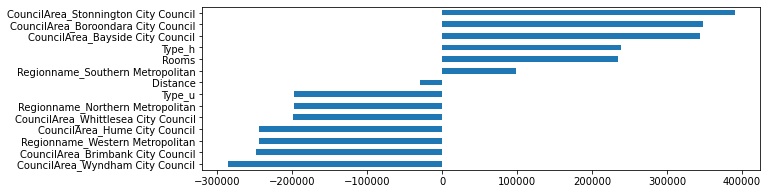

Ridge Regression, alpha=0.005
Test MAE: $216,446
Test R2: 0.675


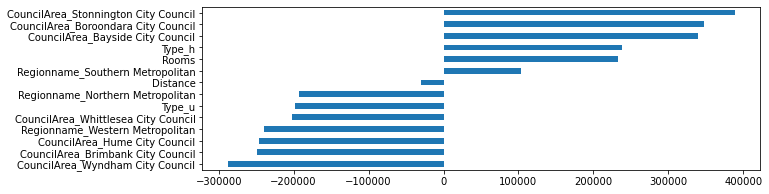

Ridge Regression, alpha=0.01
Test MAE: $216,446
Test R2: 0.675


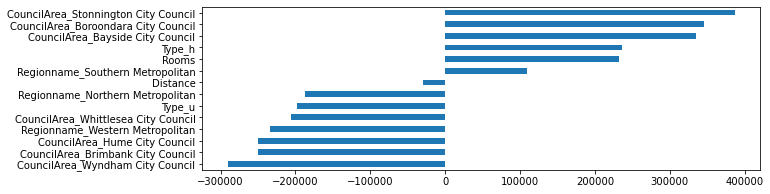

Ridge Regression, alpha=0.02
Test MAE: $216,446
Test R2: 0.675


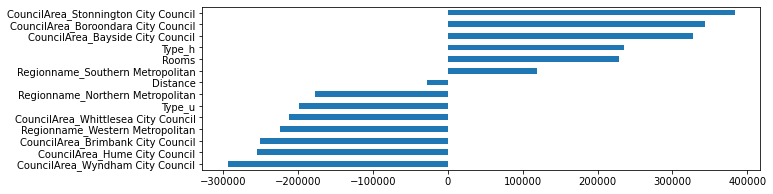

Ridge Regression, alpha=0.03
Test MAE: $216,446
Test R2: 0.675


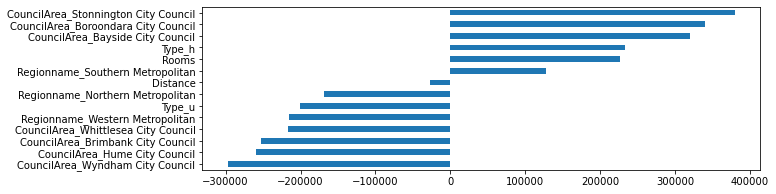

Ridge Regression, alpha=0.1
Test MAE: $216,446
Test R2: 0.675


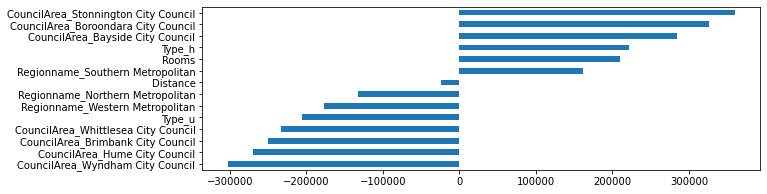

Ridge Regression, alpha=1.0
Test MAE: $216,446
Test R2: 0.675


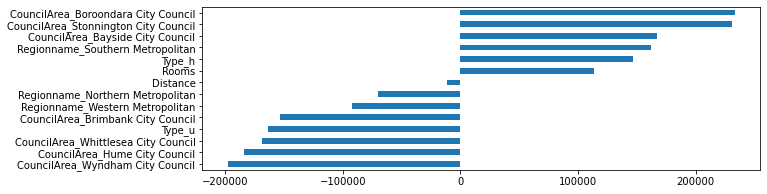

Ridge Regression, alpha=1
Test MAE: $216,446
Test R2: 0.675


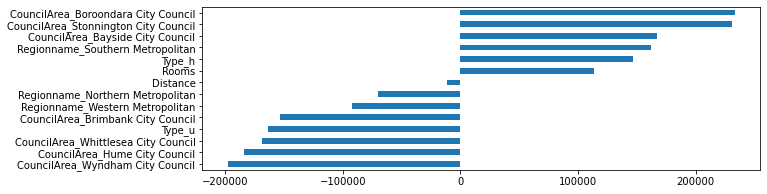

Ridge Regression, alpha=100.0
Test MAE: $216,446
Test R2: 0.675


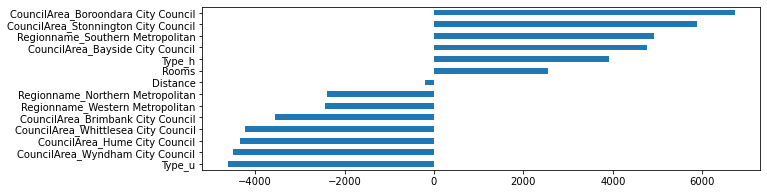

Ridge Regression, alpha=1000.0
Test MAE: $216,446
Test R2: 0.675


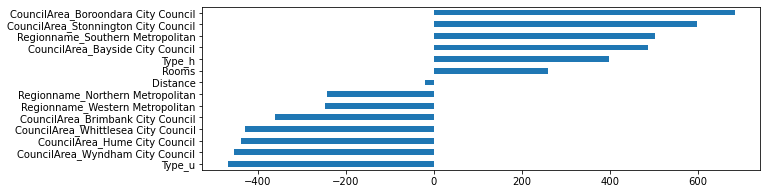

In [50]:
from sklearn.metrics import r2_score

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge Î™®Îç∏ ÌïôÏäµ
    model = Ridge(alpha=alpha, normalize=True)  
    model.fit(XX_train_final, yy_train)
    y_pred = model.predict(XX_test_final)

    # MAE for test
    mae = mean_absolute_error(yy_test, yy_pred)
    r2 = r2_score(yy_test, yy_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, XX_train_final.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()



